In [7]:
import random
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

If you need to randomly pick one element from a list you can use random.choice

In [8]:
my_best_friend = random.choice(["Alice", "Bob", "Charlie"])
my_best_friend

'Bob'

And if you need to randomly choose a sample of elements without replacement (i.e., with no duplicates), you can use random.sample:

In [9]:
lottery_numbers = range(60)
winning_numbers = random.sample(lottery_numbers, 6)
winning_numbers

[12, 52, 24, 1, 10, 42]

In [10]:
file_path = %pwd
file_path = file_path + '/mosquitos_data.csv'
file_path
mosquitos_data = pd.read_csv(file_path)
mosquitos_data.head()
data = np.array(mosquitos_data.Response)
print(mosquitos_data.head())
data

   Response Treatment
0        27      Beer
1        20      Beer
2        21      Beer
3        26      Beer
4        27      Beer


array([27, 20, 21, 26, 27, 31, 24, 21, 20, 19, 23, 24, 28, 19, 24, 29, 18,
       20, 17, 31, 20, 25, 28, 21, 27, 21, 22, 15, 12, 21, 16, 19, 15, 22,
       24, 19, 23, 13, 22, 20, 24, 18, 20])

Using numpy
https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.choice.html

In [11]:
np.random.choice(data, size=5, replace=False)

array([24, 15, 31, 18, 18])

In [12]:
print(data.dtype)
print(data.size)

int64
43


In [13]:
np.random.choice(data, size=data.size, replace=False)

array([21, 20, 21, 24, 27, 26, 19, 31, 21, 24, 23, 27, 19, 29, 21, 15, 18,
       22, 15, 31, 20, 24, 20, 22, 23, 20, 24, 17, 28, 24, 21, 19, 18, 27,
       20, 20, 28, 16, 22, 25, 12, 13, 19])

In [14]:
data

array([27, 20, 21, 26, 27, 31, 24, 21, 20, 19, 23, 24, 28, 19, 24, 29, 18,
       20, 17, 31, 20, 25, 28, 21, 27, 21, 22, 15, 12, 21, 16, 19, 15, 22,
       24, 19, 23, 13, 22, 20, 24, 18, 20])

In [15]:
np.random.shuffle(data)
data

array([20, 15, 31, 24, 18, 28, 27, 21, 21, 22, 21, 24, 23, 26, 19, 21, 19,
       28, 15, 17, 29, 20, 18, 13, 21, 19, 23, 24, 12, 27, 20, 27, 19, 24,
       24, 20, 25, 31, 20, 22, 16, 20, 22])

The difference between using np.random.choice and np.random.shuffle is that the first one does not alter the orginal data, while shuffle is 'in place'.
For that reason we will recreate the file data.

### Using numpy

First let's see the steps one by one.

In [65]:
mosquitos_data = pd.read_csv(file_path)
data = np.array(mosquitos_data.Response)
data

array([27, 20, 21, 26, 27, 31, 24, 21, 20, 19, 23, 24, 28, 19, 24, 29, 18,
       20, 17, 31, 20, 25, 28, 21, 27, 21, 22, 15, 12, 21, 16, 19, 15, 22,
       24, 19, 23, 13, 22, 20, 24, 18, 20])

In [62]:
print(mosquitos_data.Treatment.value_counts())

Beer     25
Water    18
Name: Treatment, dtype: int64


In [82]:
data_split=np.split(np.random.choice(data, size=data.size, replace=False),[25,43])

In [83]:
print(data_split[0])
print(data_split[1])

[27 24 25 24 19 21 20 23 15 29 17 18 21 20 21 27 19 15 24 22 20 20 12 23 21]
[20 19 22 16 21 31 13 18 22 31 28 24 28 20 26 24 19 27]


In [84]:
all_diff=[]
difference = data_split[0].mean()-data_split[1].mean()
all_diff.append(difference)
all_diff

[-1.6422222222222231]

### Do the exercise

p =  0.0361 %


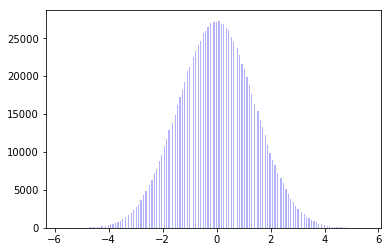

In [248]:
n_iter = 1000000
all_diff=[]
Ha = 0 
for i in range(n_iter):
        data_split=np.split(np.random.choice(data, size=data.size, replace=False),[25,43])
        difference = data_split[0].mean()-data_split[1].mean()
        all_diff.append(difference)
        if difference >= 4.4:
            Ha +=1
                
plt.hist(all_diff,bins = 250, color='b', alpha=0.3)
print('p = ', Ha/n_iter*100, "%")

### Using vectorized calculations and generators

Whereas normal functions execute and return a single result at a time, generators return a sequence of multiple results lazily, pausing after each one until the next one is requested.

First we will show the mechanics with a small file. We will scale-up later.

In [173]:
data_matrix = np.tile(data,(5,1))
data_matrix

array([[27, 20, 21, 26, 27, 31, 24, 21, 20, 19, 23, 24, 28, 19, 24, 29, 18,
        20, 17, 31, 20, 25, 28, 21, 27, 21, 22, 15, 12, 21, 16, 19, 15, 22,
        24, 19, 23, 13, 22, 20, 24, 18, 20],
       [27, 20, 21, 26, 27, 31, 24, 21, 20, 19, 23, 24, 28, 19, 24, 29, 18,
        20, 17, 31, 20, 25, 28, 21, 27, 21, 22, 15, 12, 21, 16, 19, 15, 22,
        24, 19, 23, 13, 22, 20, 24, 18, 20],
       [27, 20, 21, 26, 27, 31, 24, 21, 20, 19, 23, 24, 28, 19, 24, 29, 18,
        20, 17, 31, 20, 25, 28, 21, 27, 21, 22, 15, 12, 21, 16, 19, 15, 22,
        24, 19, 23, 13, 22, 20, 24, 18, 20],
       [27, 20, 21, 26, 27, 31, 24, 21, 20, 19, 23, 24, 28, 19, 24, 29, 18,
        20, 17, 31, 20, 25, 28, 21, 27, 21, 22, 15, 12, 21, 16, 19, 15, 22,
        24, 19, 23, 13, 22, 20, 24, 18, 20],
       [27, 20, 21, 26, 27, 31, 24, 21, 20, 19, 23, 24, 28, 19, 24, 29, 18,
        20, 17, 31, 20, 25, 28, 21, 27, 21, 22, 15, 12, 21, 16, 19, 15, 22,
        24, 19, 23, 13, 22, 20, 24, 18, 20]])

In [174]:
#Instead of using a loop I use an iterator.  
#map is a lazy function, so I force the lazy iteration.
list(map(np.random.shuffle, data_matrix))

[None, None, None, None, None]

Notice that now every element of the array is shuffled.

In [175]:
data_matrix

array([[27, 29, 25, 23, 26, 31, 21, 18, 28, 21, 31, 13, 24, 21, 19, 24, 20,
        24, 27, 15, 20, 27, 28, 19, 17, 19, 20, 24, 22, 12, 20, 18, 21, 15,
        20, 23, 22, 20, 19, 22, 24, 21, 16],
       [20, 20, 15, 22, 19, 24, 19, 21, 31, 31, 12, 26, 22, 17, 24, 19, 20,
        25, 20, 21, 23, 16, 24, 28, 18, 27, 19, 18, 24, 21, 29, 28, 23, 20,
        27, 21, 24, 15, 13, 21, 27, 20, 22],
       [16, 24, 19, 12, 27, 21, 27, 31, 22, 23, 22, 29, 18, 20, 19, 21, 17,
        15, 20, 24, 26, 20, 22, 13, 20, 21, 21, 25, 24, 20, 18, 28, 21, 24,
        27, 19, 28, 31, 23, 15, 20, 24, 19],
       [27, 19, 28, 20, 17, 28, 20, 29, 21, 24, 24, 18, 22, 31, 19, 21, 12,
        21, 21, 15, 31, 19, 15, 16, 23, 25, 13, 20, 24, 27, 18, 27, 26, 20,
        20, 20, 21, 22, 19, 22, 23, 24, 24],
       [31, 20, 21, 23, 29, 22, 21, 22, 12, 24, 19, 19, 27, 18, 21, 26, 20,
        24, 25, 23, 28, 28, 20, 21, 24, 15, 24, 19, 19, 21, 18, 20, 31, 27,
        15, 13, 17, 20, 20, 24, 22, 16, 27]])

In [180]:
array_split = np.split(data_matrix,[0,25],axis=1)  #[25,43] also works

In [181]:
array_split

[array([], shape=(5, 0), dtype=int64),
 array([[27, 29, 25, 23, 26, 31, 21, 18, 28, 21, 31, 13, 24, 21, 19, 24, 20,
         24, 27, 15, 20, 27, 28, 19, 17],
        [20, 20, 15, 22, 19, 24, 19, 21, 31, 31, 12, 26, 22, 17, 24, 19, 20,
         25, 20, 21, 23, 16, 24, 28, 18],
        [16, 24, 19, 12, 27, 21, 27, 31, 22, 23, 22, 29, 18, 20, 19, 21, 17,
         15, 20, 24, 26, 20, 22, 13, 20],
        [27, 19, 28, 20, 17, 28, 20, 29, 21, 24, 24, 18, 22, 31, 19, 21, 12,
         21, 21, 15, 31, 19, 15, 16, 23],
        [31, 20, 21, 23, 29, 22, 21, 22, 12, 24, 19, 19, 27, 18, 21, 26, 20,
         24, 25, 23, 28, 28, 20, 21, 24]]),
 array([[19, 20, 24, 22, 12, 20, 18, 21, 15, 20, 23, 22, 20, 19, 22, 24, 21,
         16],
        [27, 19, 18, 24, 21, 29, 28, 23, 20, 27, 21, 24, 15, 13, 21, 27, 20,
         22],
        [21, 21, 25, 24, 20, 18, 28, 21, 24, 27, 19, 28, 31, 23, 15, 20, 24,
         19],
        [25, 13, 20, 24, 27, 18, 27, 26, 20, 20, 20, 21, 22, 19, 22, 23, 24,
         24],


In [197]:
Beer = np.array(array_split[1])
Water = np.array(array_split[2])
print('Water\n',Water)
print('\n Beer\n',Beer)

Beer_means = Beer.mean(1)
Water_means = Water.mean(1)
Treatement_NullHyp = Beer_means - Water_means

print('\n Beer means\n', Beer_means)
print('\n Water means\n', Water_means)
print('\n Differences\n',Treatement_NullHyp)

Water
 [[19 20 24 22 12 20 18 21 15 20 23 22 20 19 22 24 21 16]
 [27 19 18 24 21 29 28 23 20 27 21 24 15 13 21 27 20 22]
 [21 21 25 24 20 18 28 21 24 27 19 28 31 23 15 20 24 19]
 [25 13 20 24 27 18 27 26 20 20 20 21 22 19 22 23 24 24]
 [15 24 19 19 21 18 20 31 27 15 13 17 20 20 24 22 16 27]]

 Beer
 [[27 29 25 23 26 31 21 18 28 21 31 13 24 21 19 24 20 24 27 15 20 27 28 19
  17]
 [20 20 15 22 19 24 19 21 31 31 12 26 22 17 24 19 20 25 20 21 23 16 24 28
  18]
 [16 24 19 12 27 21 27 31 22 23 22 29 18 20 19 21 17 15 20 24 26 20 22 13
  20]
 [27 19 28 20 17 28 20 29 21 24 24 18 22 31 19 21 12 21 21 15 31 19 15 16
  23]
 [31 20 21 23 29 22 21 22 12 24 19 19 27 18 21 26 20 24 25 23 28 28 20 21
  24]]

 Beer means
 [ 23.12  21.48  21.12  21.64  22.72]

 Water means
 [ 19.88888889  22.16666667  22.66666667  21.94444444  20.44444444]

 Differences
 [ 3.23111111 -0.68666667 -1.54666667 -0.30444444  2.27555556]


### Scale Up

In [198]:
data

array([27, 20, 21, 26, 27, 31, 24, 21, 20, 19, 23, 24, 28, 19, 24, 29, 18,
       20, 17, 31, 20, 25, 28, 21, 27, 21, 22, 15, 12, 21, 16, 19, 15, 22,
       24, 19, 23, 13, 22, 20, 24, 18, 20])

p =  0.0361 %


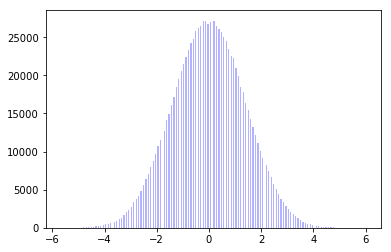

In [249]:
data_matrix = np.tile(data,(n_iter,1))
list(map(np.random.shuffle, data_matrix))
array_split = np.split(data_matrix,[0,25],axis=1)
differences = np.array(array_split[1]).mean(1)- np.array(array_split[2]).mean(1)
plt.hist(differences,bins = 250, color='b', alpha=0.3)
p = (differences>=4.4).sum()/n_iter
print('p = ', Ha/n_iter*100, "%")

In [239]:
%timeit (differences>=4.4).sum()  #check how fast it can do it!

1000 loops, best of 3: 1.41 ms per loop


### Compare times of the different approaches

In [266]:
n_iter = 1000000
def method1():
    all_diff=[]
    Ha = 0 
    for i in range(n_iter):
            data_split=np.split(np.random.choice(data, size=data.size, replace=False),[25,43])
            difference = data_split[0].mean()-data_split[1].mean()
            all_diff.append(difference)
            if difference >= 4.4:
                Ha +=1
                
    plt.hist(all_diff,bins = 250, color='b', alpha=0.3)
    print('p = ', Ha/n_iter*100, "%")

p =  0.039 %
p =  0.038400000000000004 %
p =  0.0386 %
p =  0.0397 %
1 loop, best of 3: 43.6 s per loop


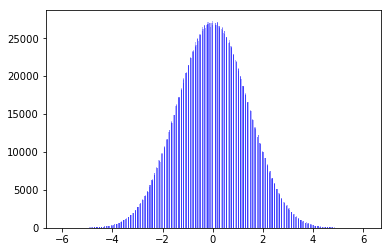

In [267]:
%timeit method1()

In [264]:
def method2():
    data_matrix = np.tile(data,(n_iter,1))
    list(map(np.random.shuffle, data_matrix))
    array_split = np.split(data_matrix,[0,25],axis=1)
    differences = np.array(array_split[1]).mean(1)- np.array(array_split[2]).mean(1)
    plt.hist(differences,bins = 250, color='b', alpha=0.3)
    p = (differences>=4.4).sum()/n_iter
    print('p = ', Ha/n_iter*100, "%")

p =  0.0361 %
p =  0.0361 %
p =  0.0361 %
p =  0.0361 %
1 loop, best of 3: 7.22 s per loop


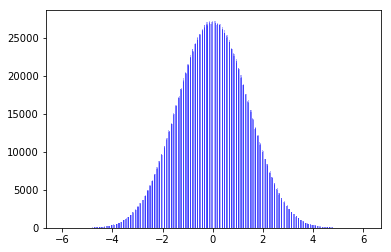

In [265]:
%timeit method2()

In [268]:
n_iter = 10000000

p =  0.03667 %
p =  0.03588 %
p =  0.03627 %
p =  0.03745 %
1 loop, best of 3: 7min 8s per loop


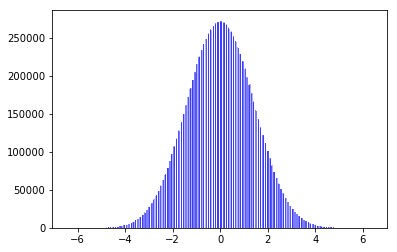

In [269]:
%timeit method1()

p =  0.0036100000000000004 %
p =  0.0036100000000000004 %
p =  0.0036100000000000004 %
p =  0.0036100000000000004 %
1 loop, best of 3: 1min 7s per loop


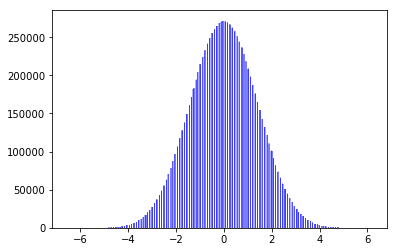

In [270]:
%timeit method2()

#### Another way to time blocks of code

p =  0.034999999999999996 %
 

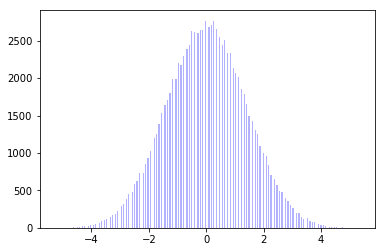

In [275]:
%%prun
n_iter = 100000

all_diff=[]
Ha = 0 
for i in range(n_iter):
        data_split=np.split(np.random.choice(data, size=data.size, replace=False),[25,43])
        difference = data_split[0].mean()-data_split[1].mean()
        all_diff.append(difference)
        if difference >= 4.4:
            Ha +=1
                
plt.hist(all_diff,bins = 250, color='b', alpha=0.3)
print('p = ', Ha/n_iter*100, "%")

----
##### Output

  5527655 function calls (5520738 primitive calls) in 6.558 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   
   100000    1.667    0.000    2.505    0.000 {method 'choice' of 'mtrand.RandomState' objects}
   
   301960    0.919    0.000    0.919    0.000 {method 'reduce' of 'numpy.ufunc' objects}
   
   ...
   

p =  0.034999999999999996 %
 

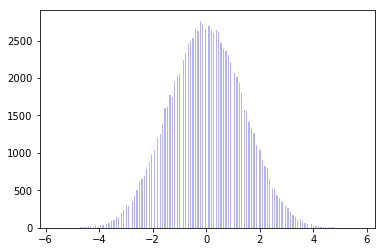

In [277]:
%%prun
data_matrix = np.tile(data,(n_iter,1))
list(map(np.random.shuffle, data_matrix))
array_split = np.split(data_matrix,[0,25],axis=1)
differences = np.array(array_split[1]).mean(1)- np.array(array_split[2]).mean(1)
plt.hist(differences,bins = 250, color='b', alpha=0.3)
p = (differences>=4.4).sum()/n_iter
print('p = ', Ha/n_iter*100, "%")

---
##### Output

 727682 function calls (720765 primitive calls) in 1.187 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   
        1    0.702    0.702    1.187    1.187 <string>:2(<module>)
        
   200000    0.097    0.000    0.097    0.000 _internal.py:225(__init__)
   